In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/forest_cover.csv")

In [6]:
df.shape

(110393, 52)

In [7]:
df.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,wilderness_area1,wilderness_area2,wilderness_area3,...,soil_type_32,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,soil_type_40,class
0,2754,146,5,150,2,1790,700,1,0,0,...,0,0,0,0,0,0,0,0,0,Lodgepole_Pine
1,3219,21,8,67,-1,2869,1825,0,0,1,...,0,0,0,0,0,0,0,0,0,Spruce_Fir
2,2965,337,16,42,7,4288,324,1,0,0,...,0,0,0,0,0,0,0,0,0,Spruce_Fir
3,2368,14,15,150,65,1006,812,0,0,0,...,0,0,0,0,0,0,0,0,0,Douglas_fir
4,2366,165,3,390,156,1165,582,0,0,0,...,0,0,0,0,0,0,0,0,0,Douglas_fir


In [8]:
df.dtypes

,0
elevation,int64
aspect,int64
slope,int64
horizontal_distance_to_hydrology,int64
Vertical_Distance_To_Hydrology,int64
Horizontal_Distance_To_Roadways,int64
Horizontal_Distance_To_Fire_Points,int64
wilderness_area1,int64
wilderness_area2,int64
wilderness_area3,int64


In [24]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values:", missing_values[missing_values > 0])

Missing values: Series([], dtype: int64)


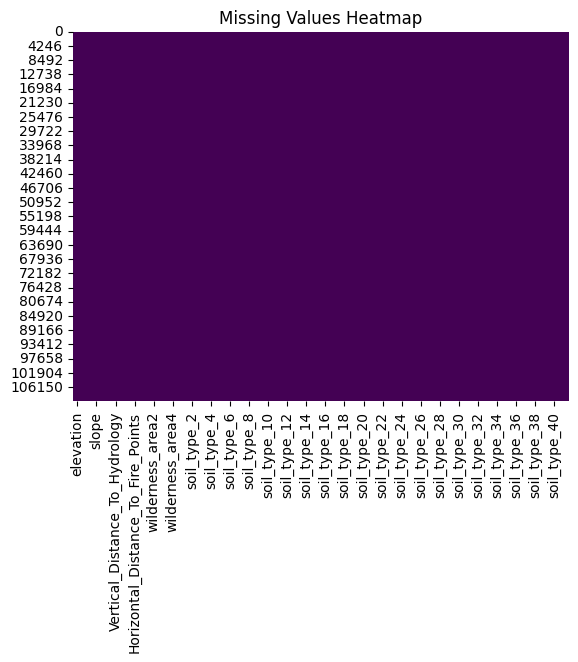

In [25]:
# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [9]:
# Identify binary features
binary_columns = [col for col in df.columns if df[col].nunique() == 2]
print("Binary (categorical) columns:", binary_columns)


Binary (categorical) columns: ['wilderness_area1', 'wilderness_area2', 'wilderness_area3', 'wilderness_area4', 'soil_type_1', 'soil_type_2', 'soil_type_3', 'soil_type_4', 'soil_type_5', 'soil_type_6', 'soil_type_7', 'soil_type_8', 'soil_type_9', 'soil_type_10', 'soil_type_11', 'soil_type_12', 'soil_type_13', 'soil_type_14', 'soil_type_15', 'soil_type_16', 'soil_type_17', 'soil_type_18', 'soil_type_19', 'soil_type_20', 'soil_type_21', 'soil_type_22', 'soil_type_23', 'soil_type_24', 'soil_type_25', 'soil_type_26', 'soil_type_27', 'soil_type_28', 'soil_type_29', 'soil_type_30', 'soil_type_31', 'soil_type_32', 'soil_type_33', 'soil_type_34', 'soil_type_35', 'soil_type_36', 'soil_type_37', 'soil_type_38', 'soil_type_39', 'soil_type_40']


In [16]:
# Step 2: Identify categorical columns explicitly (using 'category' dtype)
categorical_columns = [col for col in df.columns if pd.api.types.is_object_dtype(df[col])]
print("categorical columns:", categorical_columns)


categorical columns: ['class']


In [15]:
# Step 3: Identify numerical columns
numerical_columns = [col for col in df.columns
                     if df[col].dtype in ['int64', 'float64'] and
                     col not in binary_columns and
                     col not in categorical_columns]
print("numerical columns:", numerical_columns)

numerical columns: ['elevation', 'aspect', 'slope', 'horizontal_distance_to_hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']


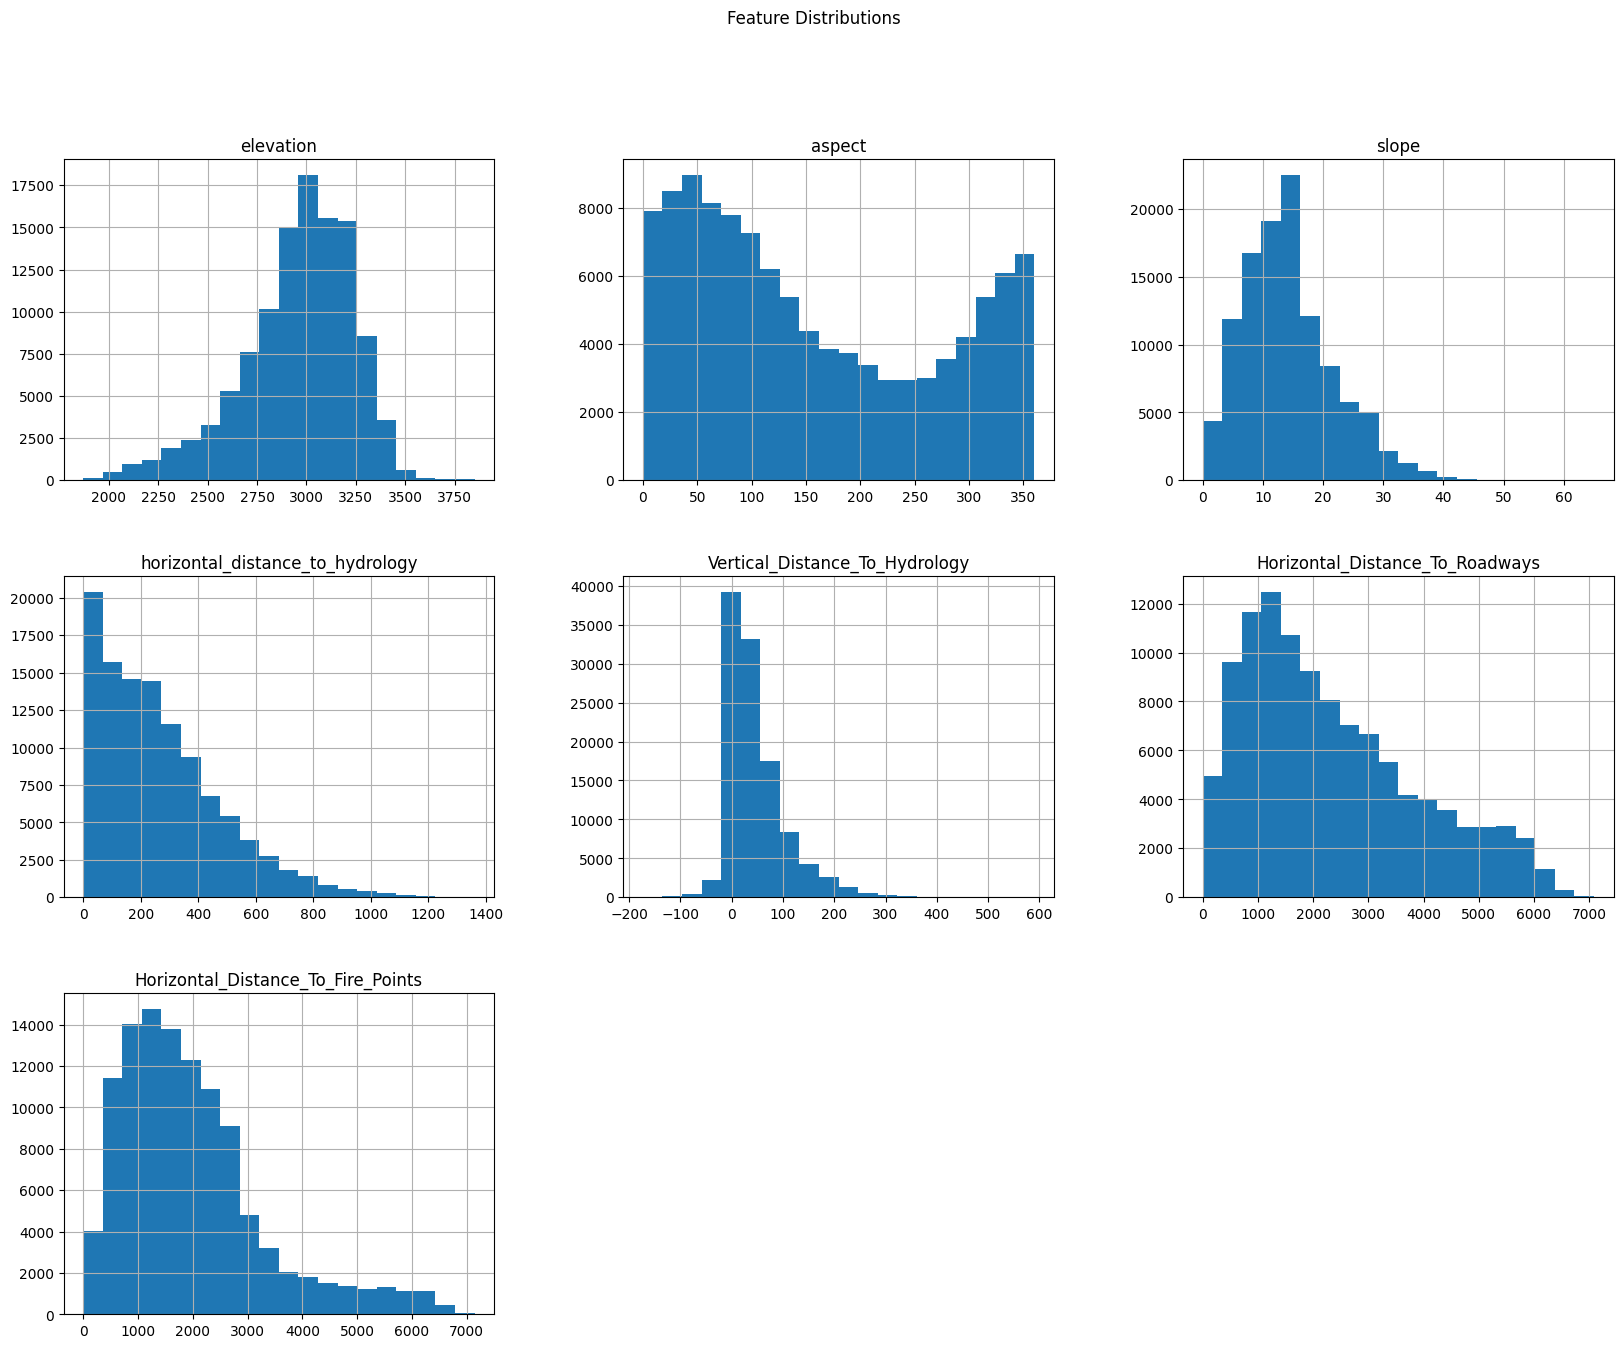

In [26]:
# Visualize the distribution of numerical features
df[numerical_columns].hist(bins=20, figsize=(20, 15))
plt.suptitle("Feature Distributions")
plt.show()


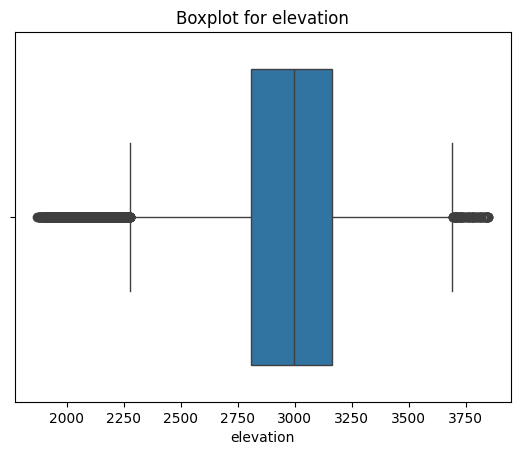

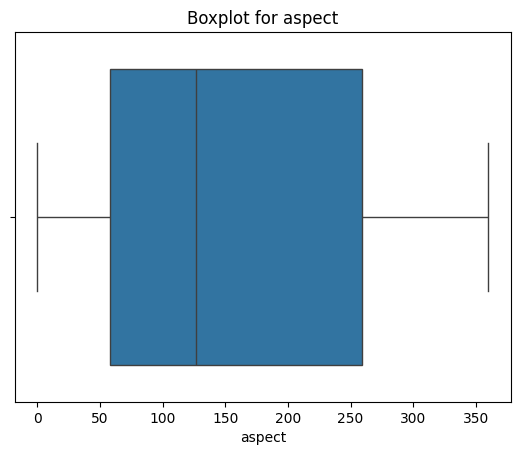

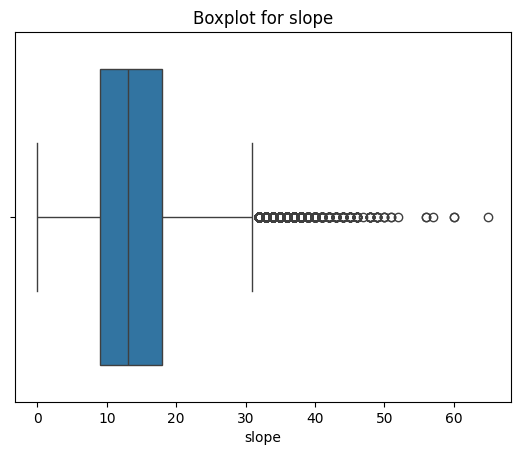

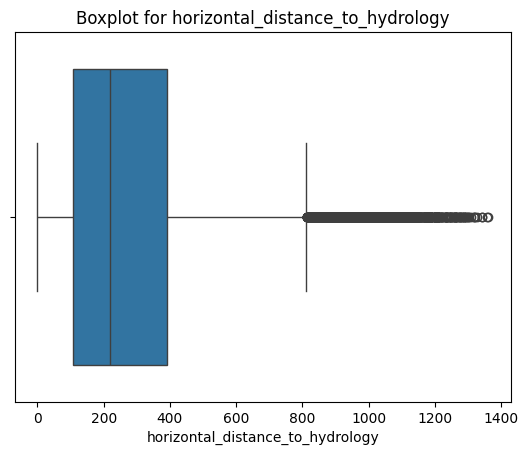

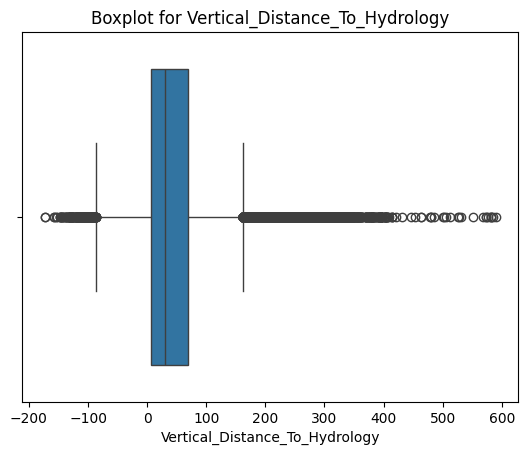

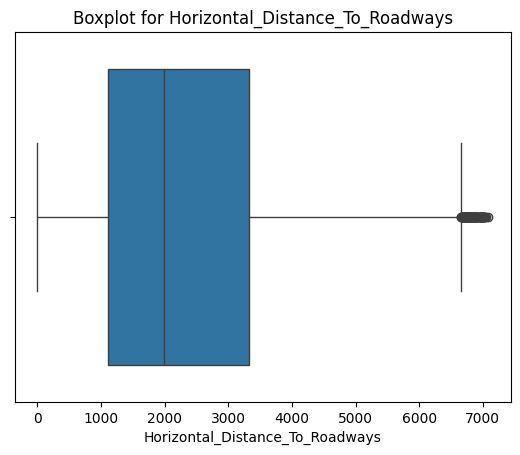

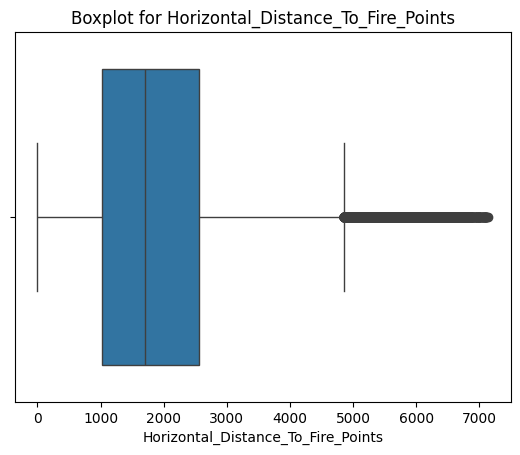

In [42]:
# Boxplot to detect outliers
for col in numerical_columns:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

# You can remove outliers using IQR or Z-Score methods if needed.


In [17]:
X = df.drop(columns=['class'])
y = df['class']

In [20]:
y.value_counts()

,count
class,
Lodgepole_Pine,51682
Spruce_Fir,38906
Ponderosa_Pine,7375
Krummholz,4508
Douglas_fir,3969
Aspen,2614
Cottonwood_Willow,1339


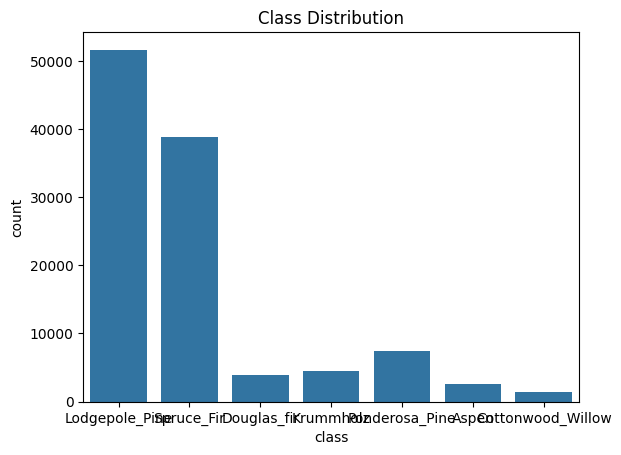

In [27]:
# Visualize class distribution
sns.countplot(x='class', data=df)
plt.title("Class Distribution")
plt.show()


In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso

# Encode y labels to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Fit Lasso model
lasso = Lasso(alpha=0.01)  # Adjust alpha based on your dataset
lasso.fit(X, y_encoded)

# Select features with non-zero coefficients
important_features = X.columns[lasso.coef_ != 0]
print("Selected Features:", important_features)


Selected Features: Index(['elevation', 'aspect', 'slope', 'horizontal_distance_to_hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points', 'wilderness_area3',
       'wilderness_area4', 'soil_type_13', 'soil_type_22', 'soil_type_23',
       'soil_type_24', 'soil_type_30', 'soil_type_38'],
      dtype='object')


In [43]:
# Add y_encoded as a column to the dataframe
df['encoded_class'] = y_encoded

# Now you can see the encoded class labels alongside the features
print(df[['encoded_class']].head())


   encoded_class
0              4
1              6
2              6
3              2
4              2


In [28]:
X = df[important_features]

In [29]:
X

,elevation,aspect,slope,horizontal_distance_to_hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,wilderness_area3,wilderness_area4,soil_type_13,soil_type_22,soil_type_23,soil_type_24,soil_type_30,soil_type_38
0,2754,146,5,150,2,1790,700,0,0,0,0,0,0,0,0
1,3219,21,8,67,-1,2869,1825,1,0,0,0,0,0,0,0
2,2965,337,16,42,7,4288,324,0,0,0,0,0,0,0,0
3,2368,14,15,150,65,1006,812,0,1,0,0,0,0,0,0
4,2366,165,3,390,156,1165,582,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110388,2314,237,17,390,20,1242,815,0,1,0,0,0,0,0,0
110389,2288,184,4,0,0,201,433,0,1,0,0,0,0,0,0
110390,2232,141,32,85,51,1188,1104,0,1,0,0,0,0,0,0
110391,2221,163,27,0,0,738,417,0,1,0,0,0,0,0,0


In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Check the shapes of train-test splits
print("Train Shape:", X_train.shape, y_train.shape)
print("Test Shape:", X_test.shape, y_test.shape)


Train Shape: (88314, 15) (88314,)
Test Shape: (22079, 15) (22079,)


In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
# Initialize and train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [33]:

# Predict on test data
y_pred = rf_model.predict(X_test_scaled)

In [34]:
# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8757190090130894
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.44      0.55       497
           1       0.59      0.27      0.37       287
           2       0.80      0.63      0.71       793
           3       0.87      0.73      0.80       906
           4       0.88      0.94      0.91     10374
           5       0.83      0.84      0.84      1410
           6       0.90      0.89      0.89      7812

    accuracy                           0.88     22079
   macro avg       0.80      0.68      0.72     22079
weighted avg       0.87      0.88      0.87     22079

Confusion Matrix:
 [[ 218    0    7    6  177   28   61]
 [   5   78    8    6   97   31   62]
 [   4    8  500    7  121   88   65]
 [   2    3    4  662  102   14  119]
 [  31   21   38   28 9737   59  460]
 [   7    6   39   12  110 1189   47]
 [  24   16   26   37  734   24 6951]]


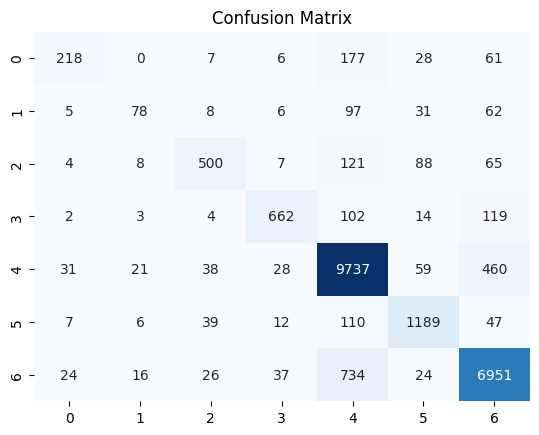

In [35]:
# Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.show()

In [39]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cross_val_scores)
print("Average CV Accuracy:", np.mean(cross_val_scores))


Cross-validation scores: [0.86316028 0.86684029 0.86299043 0.8643492  0.86354886]
Average CV Accuracy: 0.8641778129294228


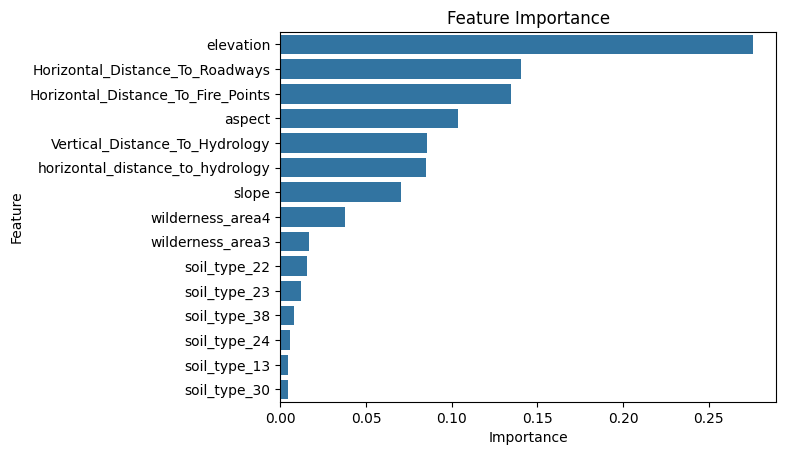

In [41]:
# Get feature importance from the trained model
importances = rf_model.feature_importances_

# Create a DataFrame to show the feature importances
importance_df = pd.DataFrame({'Feature': important_features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance")
plt.show()


1. Accuracy Score:

Accuracy Score: 0.8757190090130894
This is the overall accuracy of your model.
Accuracy tells you the proportion of correct predictions out of all the predictions made.
In this case, your model correctly predicted 87.57% of the test data.

2. Classification Report:
The classification report gives more detailed metrics on how well your model performed for each class (category). The metrics are:

Precision: The proportion of positive predictions that were actually correct. It tells you how many of the items predicted as a certain class were actually that class.

Recall: The proportion of actual positives that were correctly identified. It tells you how many of the items that belong to a class were correctly predicted.


F1-Score: The harmonic mean of precision and recall. It balances both precision and recall, so it is useful when you want a single metric for performance.
Support: The number of occurrences of each class in the dataset.
Here’s what each class means:

               precision    recall  f1-score   support
For each class (0, 1, 2, etc.):

Class 0 (e.g., Lodgepole Pine):

Precision: 0.75 means that when the model predicted class 0, it was correct 75% of the time.
Recall: 0.44 means that of all the actual class 0 instances, the model correctly identified 44% of them.
F1-Score: 0.55 is a balance of precision and recall for class 0.
Support: There are 497 instances of class 0 in the dataset.
Class 1 (e.g., Spruce Fir):

Precision: 0.59 means that 59% of the predictions for class 1 were correct.
Recall: 0.27 means that only 27% of actual class 1 instances were correctly predicted.
F1-Score: 0.37 is a combination of precision and recall.
Support: There are 287 instances of class 1.
And similarly for other classes (2, 3, 4, etc.). The model performs best for class 4 (the class with the highest number of instances), with an F1-Score of 0.91.

Key Average Metrics:

Macro Average: This is the average performance across all classes, treating each class equally.

Precision: 0.80 (average of precision across all classes).
Recall: 0.68 (average of recall across all classes).
F1-Score: 0.72 (average of F1-scores across all classes).
Weighted Average: This takes into account the support (number of instances) for each class, so larger classes will weigh more in the average.

Precision: 0.87
Recall: 0.88
F1-Score: 0.87
3. Confusion Matrix:
The confusion matrix shows how many items were correctly and incorrectly classified. It is a table where:

Each row represents the true class (actual values).
Each column represents the predicted class (predicted values).
For example, the first row [218, 0, 7, 6, 177, 28, 61] corresponds to Class 0:

218 instances of Class 0 were correctly predicted as Class 0.
0 instances of Class 0 were incorrectly predicted as Class 1.
7 instances of Class 0 were incorrectly predicted as Class 2.
6 instances of Class 0 were incorrectly predicted as Class 3.
And so on for the other classes.
Interpreting the Confusion Matrix:
Diagonal elements (e.g., 218 for Class 0, 78 for Class 1) represent correct predictions.
Off-diagonal elements represent misclassifications. For example, 177 instances of Class 0 were wrongly predicted as Class 4.

Summary:

Your model is overall accurate with an accuracy of 87.57%.
It performs well for certain classes (e.g., class 4 with an F1-score of 0.91).
The model is not perfect, as it struggles more with some classes, like Class 1 (Spruce Fir), where it has low recall (27%) and F1-score (0.37).
You can improve the model's performance by:

Handling class imbalance (if some classes have fewer instances).
Trying different models or fine-tuning the current model.
Using techniques like oversampling or undersampling for the imbalanced classes.